# 載入必要套件或取消科學記號

In [3]:
import re
import os
import glob
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [5]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 6.0) #視覺圖放大，預設 (8.0,4.0)
plt.rcParams['image.interpolation'] = 'nearest'
pd.options.display.float_format = '{:.2f}'.format  #pandas 取消科學記號，只顯示小數點第二位
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',300)

In [ ]:
#np.__version__,pd.__version__

---

# 1.顯示資料集清單列

In [7]:
def show_data():  #以清單方式顯示data資料夾的內容
    ''' 輸出data資料夾下所有的csv檔案及容量。'''
    check_dir=os.listdir('.')
    if 'data' in check_dir or os.getcwd().split('\\')[-1] in 'data' :
        if os.getcwd().split('\\')[-1] not in 'data':
            os.chdir('data')
        print('# Index&File '+' '*30+'sizes')
        index = 1
        for f in glob.glob('*.csv'):
            print('{}.'.format(index)+f.ljust(40) + str(round(os.path.getsize('' + f) / 1000000, 2)) + 'MB')
            index += 1
    else:
        print("警告:請先建立data資料夾，並將csv檔案放入該資料夾。")

In [3]:
#show_data.__doc__  #文件說明

In [9]:
show_data()

# Index&File                               sizes
1.application_test.csv                    26.57MB
2.application_train.csv                   166.13MB
3.installments_payments.csv               723.12MB
4.previous_application.csv                404.97MB


---

# 2.載入資料集

In [11]:
def load_data(num):
    '''傳入資料集清單列的index，並將選定的資料載入於記憶體內。'''
    global data
    global data_name
    data =''
    data_list = glob.glob('*.csv')
    num -= 1
    data_name = (data_list[num])
    print('Loading File is = '+data_list[num])
    data = pd.read_csv("{}".format(data_name))
    print('此資料集共有 {:,} 列， {:,} 欄，總計 {:,} 筆資料。'.format(data.shape[0],data.shape[1],data.size))

In [ ]:
#load_data.__doc__  #文件說明

In [12]:
load_data(3) #輸入清單列的index

Loading File is = installments_payments.csv
此資料集共有 13,605,401 列， 8 欄，總計 108,843,208 筆資料。


---

## 將空白字元（空格、換行符號等）全部取代為空值(NAN)...非常耗時(主要驗證資料有沒有人為錯誤）

In [ ]:
# data.replace(to_replace=r'^\s*$',value=np.nan,regex=True,inplace=True)

---

# 3.資料集空值視覺化

In [24]:
def show_null(): #空值運算
    '''輸出資料集內欄位哪些含有空值，顯示數量及比例並繪製圖表。'''
    total_coulumns = data.columns.values.size #統計資料集總共有多少欄位
    count_null = data.isnull().any() #以T/F顯示哪些是含有空值的欄位
    count_total_null = count_null.sum() #以T/F顯示哪些是含有空值的欄位
    count_null = data.isnull().sum()[count_null==True] #以Mark遮罩方式，去除沒有空值的欄位
    null_percent = (100 * count_null / len(data)) #以百分比顯示單一欄位的空值百分比
    null_table = pd.concat([count_null, null_percent], axis=1) 
    null_table = null_table.rename(columns={0: '空值數量', 1: '空值比例(%)'}) 
    print(null_table.sort_values(by='空值數量', ascending=False)) 
    print('{} 資料集總計有 {} 個欄位，\n其中有空值的欄位計有 {} 個({:.2f}%)。'.format(data_name,total_coulumns,count_total_null,count_total_null/total_coulumns*100))
    count_null.plot(kind='bar',title='number of missing values') 

In [ ]:
# show_null.__doc__ #文件說明

                    空值數量  空值比例(%)
DAYS_ENTRY_PAYMENT  2905     0.02
AMT_PAYMENT         2905     0.02
installments_payments.csv 資料集總計有 8 個欄位，
其中有空值的欄位計有 2 個(25.00%)。


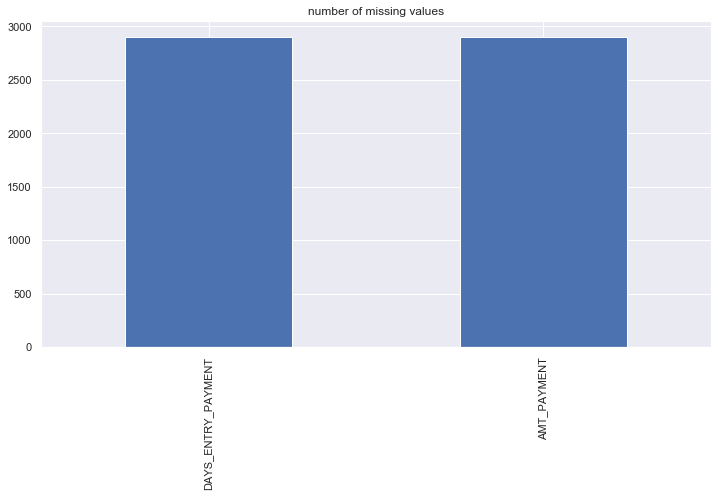

In [25]:
show_null() #將資料欄位有空值部分視覺化

---

# 4.檢視特徵型別(顯示品質報告) 

In [26]:
def data_categorical_report():
    '''輸出類別型別資料品質報告'''
    if sum(data.dtypes==object) !=0: 
        show_data=data.select_dtypes(include=['object']).describe()
        get_num=len(data.select_dtypes(include=['object']).columns)
        print('{} 資料集為類別型別欄位計有 {} 個。'.format(data_name,get_num))
        return show_data
    else:
        print('{} 資料集沒有非數值型別!!!'.format(data_name))
def data_integer_report():
    '''輸出數值型別資料品質報告'''
    show_data=data.select_dtypes(include=['int64','float64']).describe()
    get_num=len(data.select_dtypes(include=['int64','float64']).columns)
    print('{} 資料集為數值型別欄位計有 {} 個。'.format(data_name,get_num))
    return show_data

##### 數值型別

In [27]:
# data_categorical_report.__doc__ #文件說明

In [28]:
data_integer_report()

installments_payments.csv 資料集為數值型別欄位計有 8 個。


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,13605401.00,13605401.00,13605401.00,13605401.00,13605401.00,13602496.00,13605401.00,13602496.00
mean,1903364.97,278444.88,0.86,18.87,-1042.27,-1051.11,17050.91,17238.22
std,536202.91,102718.31,1.04,26.66,800.95,800.59,50570.25,54735.78
min,1000001.00,100001.00,0.00,1.00,-2922.00,-4921.00,0.00,0.00
25%,1434191.00,189639.00,0.00,4.00,-1654.00,-1662.00,4226.09,3398.26
50%,1896520.00,278685.00,1.00,8.00,-818.00,-827.00,8884.08,8125.52
75%,2369094.00,367530.00,1.00,19.00,-361.00,-370.00,16710.21,16108.42
max,2843499.00,456255.00,178.00,277.00,-1.00,-1.00,3771487.85,3771487.85


###### 類別型別  

In [ ]:
# data_integer_report.__doc__ #文件說明

In [29]:
data_categorical_report()

installments_payments.csv 資料集沒有非數值型別!!!


---

# 5.視覺化類別型別(合併重複項目)

In [30]:
def unique_object_of_column():
    '''輸出資料集欄位為類別型別，並顯示其不重複數量'''
    if sum(data.dtypes==object) !=0:
        unique_object = data.select_dtypes(include=['object']).nunique()
        unique_object = pd.DataFrame(unique_object,columns=['欄位不重複數量'])
        unique_object.columns.name ='欄位名稱-類別型別'
        string =('{} 資料集非數值型別欄位計有 {} 個。'.format(data_name,len(unique_object.values)))
        unique_object = unique_object.sort_values(by='欄位不重複數量', ascending=False)
        index_data = (pd.DataFrame({'欄位名稱-類別型別':pd.Series(unique_object.index),'欄位不重複數量':pd.Series(unique_object.values.reshape(-1,))},index=list(range(1,len(unique_object.values.reshape(-1,))))))
        index_data.columns.name = 'Index'
        get_values = unique_object.values.reshape(-1)
        get_values = get_values.tolist()
        get_index = [getting for getting in unique_object.index]
        plt.pie(get_values, labels = get_index, autopct = '%1.1f%%')
        plt.axis('equal')
        plt.show()
        print('{} 資料集非數值型別欄位計有 {} 個。'.format(data_name,len(unique_object.values)))
        return index_data
    else:
        print('{} 資料集沒有非數值型別!!!'.format(data_name))
def unique_object_of_index(num=1):
    '''輸入對應的Index，查看上表重複數值型別顯示的欄位內的各自變數佔的比例及數量。'''
    unique_object = data.select_dtypes(include=['object']).nunique()
    unique_object = pd.DataFrame(unique_object,columns=['sort'])
    unique_object = unique_object.sort_values(by='sort', ascending=False)
    column_name=unique_object.index[num]
    unique_index=data[column_name].unique().tolist()
    index_mark=data[column_name].values
    get_num=[]
    for i in range (0,len(unique_index)):
        get_num.append((unique_index[i] ==index_mark).sum().tolist())
    label_dict=dict(zip(unique_index,get_num))
    label_dict=sorted( label_dict.items() ,key=lambda get_sort:get_sort[1] , reverse =True )
    num = 1
    print('{} 資料集之類別型別 \"{}\" 欄位計有 {} 個不重複的變數。'.format(data_name,column_name,len(unique_index)))
    print('# Index&Names'.ljust(60)+'變數的個數')
    for i in range (0,len(unique_index)):
        unique_num=(unique_index[i] == index_mark ).sum().tolist()
        print ("  {}.".format(num) , " {0:<55} ".format(unique_index[i]),"{:,}".format(unique_num) ,sep ='' )
        num += 1
    plt.pie( dict(label_dict).values(), labels = label_dict , autopct = '%1.1f%%')
    plt.axis('equal')
    plt.show()

In [ ]:
#unique_object_of_column.__doc__ #文件說明

In [31]:
unique_object_of_column()

installments_payments.csv 資料集沒有非數值型別!!!


In [ ]:
#unique_object_of_index #文件說明

In [32]:
unique_object_of_index(8) #輸入上表清單的index,欄位第一個為預設值。

KeyError: 8

# 6.視覺化數值型別關聯程度

In [13]:
def show_heatmap(x_axis = 15, y_axis = 10):
    '''將資料集數值型別關聯度以視覺化呈現，參數X，Y可以改變圖的大小。'''
    int_corr=data.select_dtypes(include=['int64','float64']).corr()
    plt.figure(figsize =(x_axis,y_axis))
    sns.heatmap(np.abs(int_corr),annot = True, fmt='.2f', vmin=0., vmax=1., cmap='YlGnBu', linecolor="white")
    plt.show()
    print('{} 資料集數值型別欄位計有 {} 個。'.format(data_name, len(data.select_dtypes(include=['int64','float64']).columns)))
    return int_corr
def show_colums_of_int_detiall():
    target_index=data.select_dtypes(include=['int64','float64']).columns.to_list()
    for item in target_index:
        fig = plt.figure()
        ax = fig.add_axes([0,0, 1, 1])   
        plt.text(0.9, 0.9, "{}".format(data[item].describe()), size=18, 
                 ha="center", va="center",transform=ax.transAxes,
                 bbox=dict(facecolor='w', alpha=0.3)) 
        plt.hist(data[item] ,bins=50, facecolor='g', alpha=0.75)
        plt.show()

In [ ]:
#show_heatmap.__doc__ #文件說明

In [ ]:
show_heatmap(x_axis=100,y_axis=100) #x_axis=15,y_axis=10 為預設值

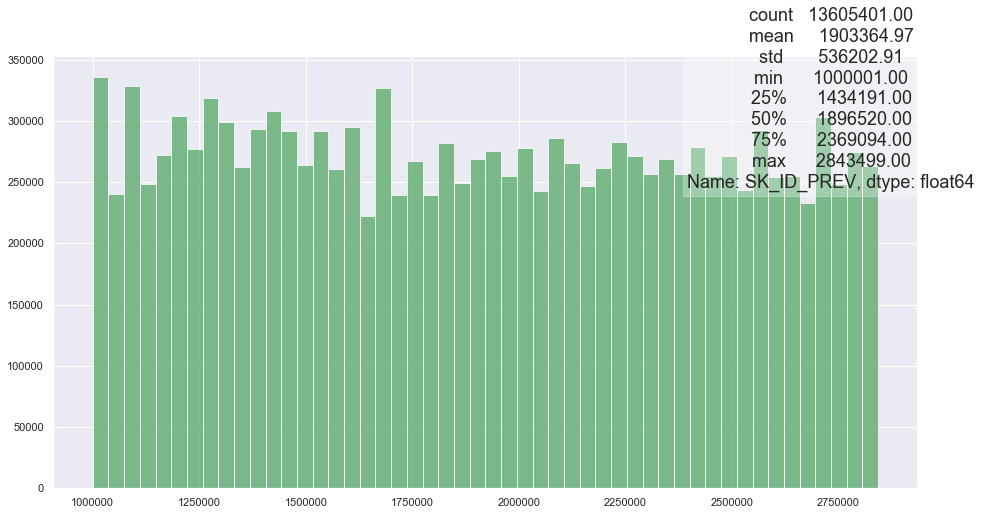

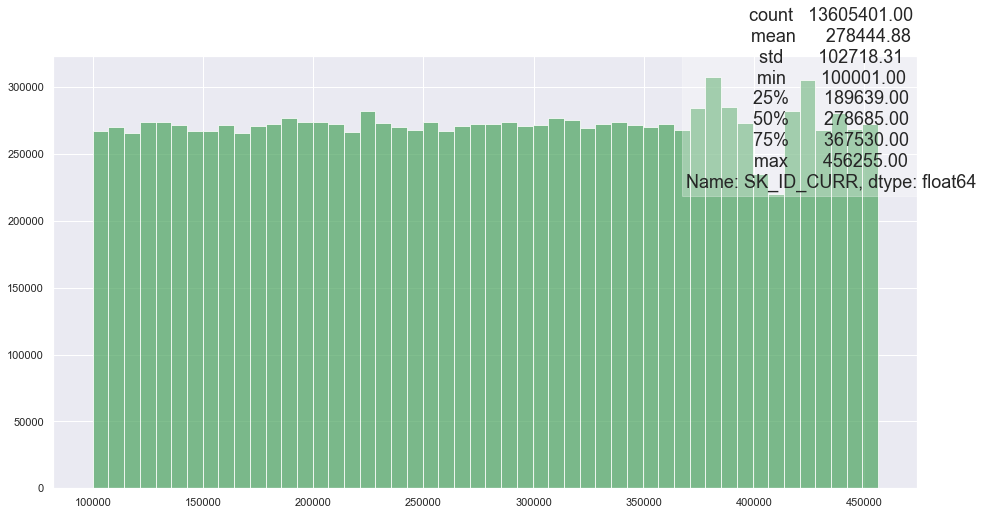

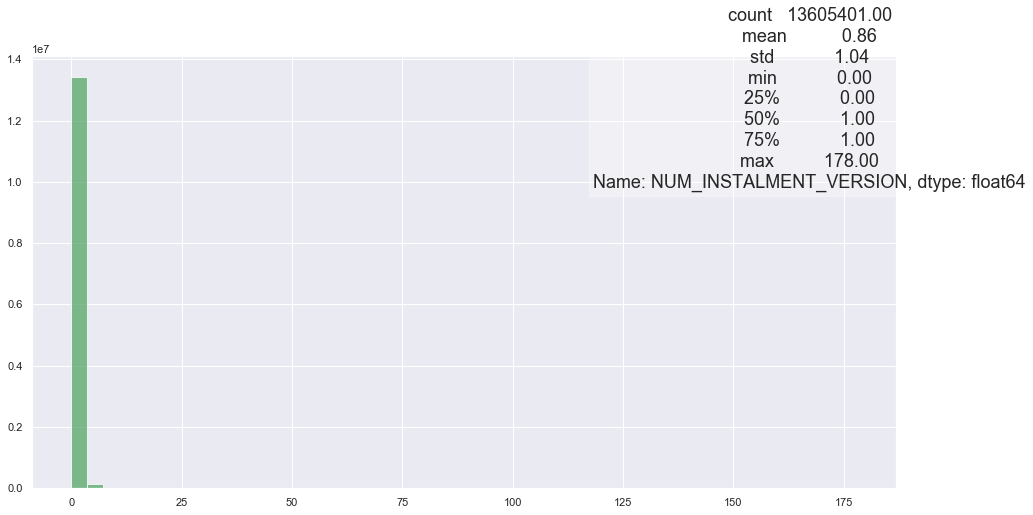

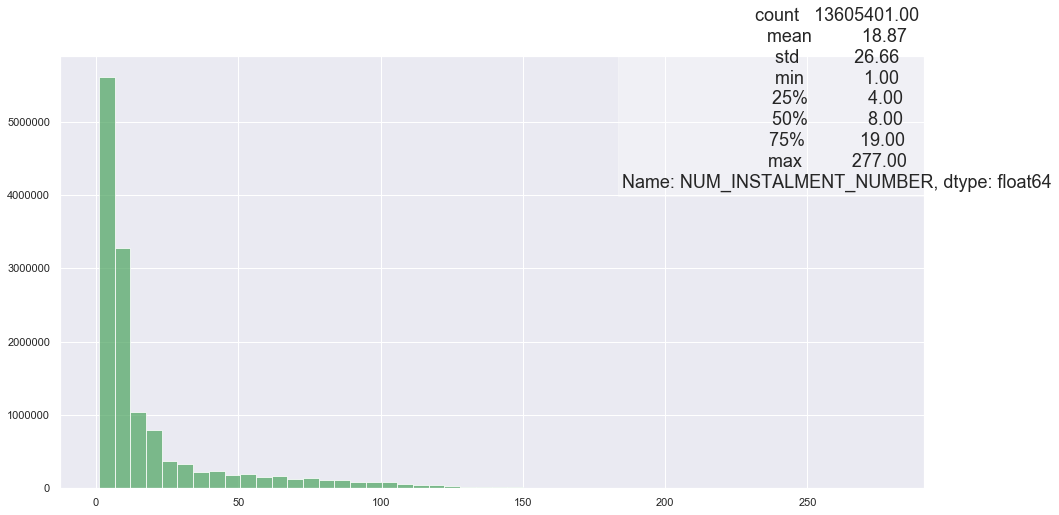

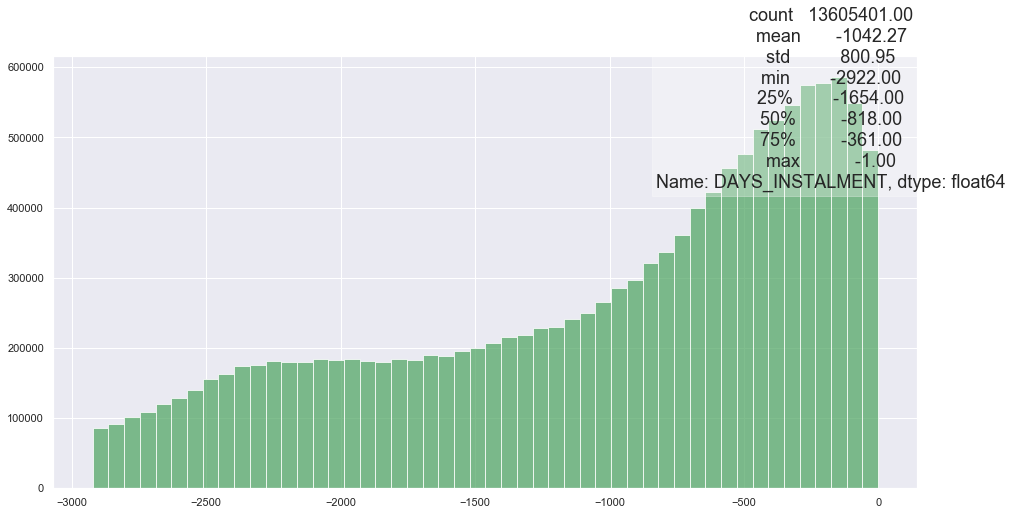

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


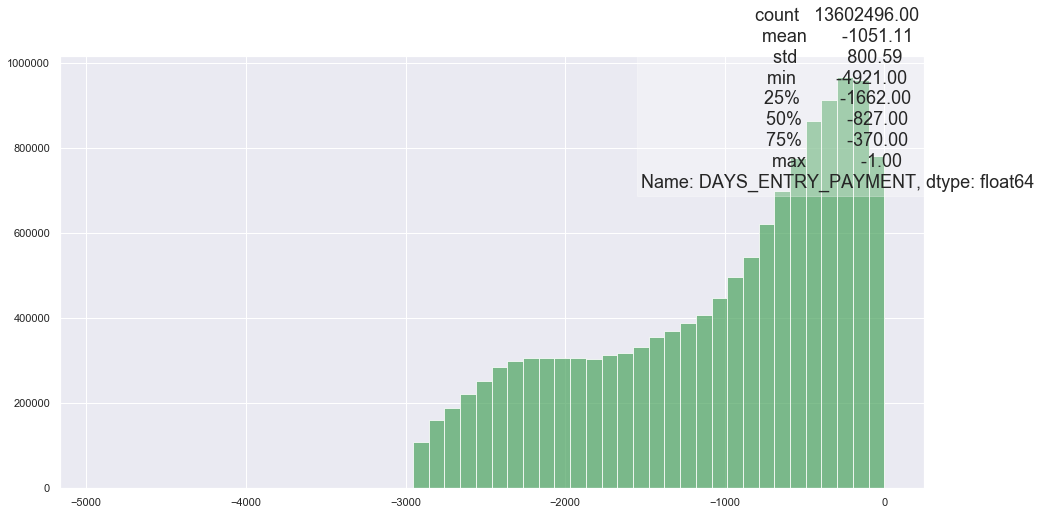

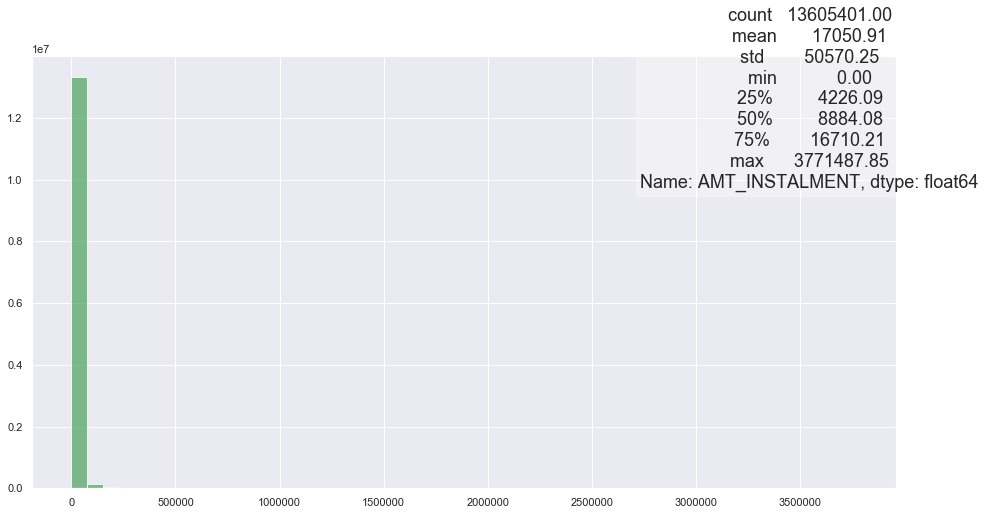

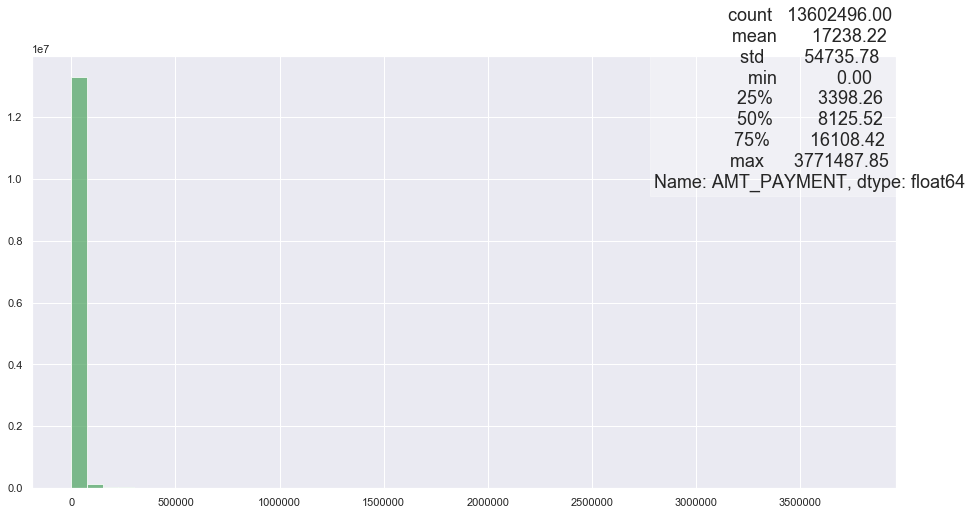

In [14]:
show_colums_of_int_detiall()

# 7.取出數值型別關聯程度高的欄位

In [34]:
def pearson_corr(PCCs = 0.7 ,target='' ,detiall = None ):
    '''設定皮爾森係數，選出相關欄位，開啟detiall顯示更多資訊。'''
    if target != '':
        
        select_corr_cloums=np.abs(data.select_dtypes(include=['int64','float64']).corr()[target])
        target_corr_desc=select_corr_cloums[select_corr_cloums>=PCCs].sort_values(ascending=False)[1:]
        target_corr_desc.plot(kind='barh',title='{}{:>10}PCCs>{}:Totalled={}'.format(target,'',PCCs,target_corr_desc.count())) 
        if detiall :
            target_index=select_corr_cloums[select_corr_cloums>=PCCs].sort_values(ascending=False).index.to_list()
            for item in target_index:
                fig = plt.figure()
                ax = fig.add_axes([0,0, 1, 1])   
                plt.text(0.9, 0.9, "{}".format(data[item].describe()), size=15, 
                         ha="center", va="center",transform=ax.transAxes,
                         bbox=dict(facecolor='w', alpha=0.3)) 
                plt.hist(data[item] ,bins=50, facecolor='g', alpha=0.75)
                plt.show()
    else:
        int_corr = np.abs(data.select_dtypes(include=['int64','float64']).corr())
        int_corr = int_corr[int_corr >= PCCs]
        get_index = int_corr.notnull().sum()[int_corr.notnull().sum() > 1]
        get_index_list = get_index.index.values.tolist()
        print ('{} 資料集，在皮爾森相關係數設定為 {} 時，計有 {} 個數值型欄位有相關性。'.format(data_name,PCCs,len(get_index)))
        return get_index_list

In [ ]:
# pearson_corr.__doc__ #文件說明

In [35]:
pearson_corr(PCCs=0.7)

installments_payments.csv 資料集，在皮爾森相關係數設定為 0.7 時，計有 4 個數值型欄位有相關性。


['DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT']

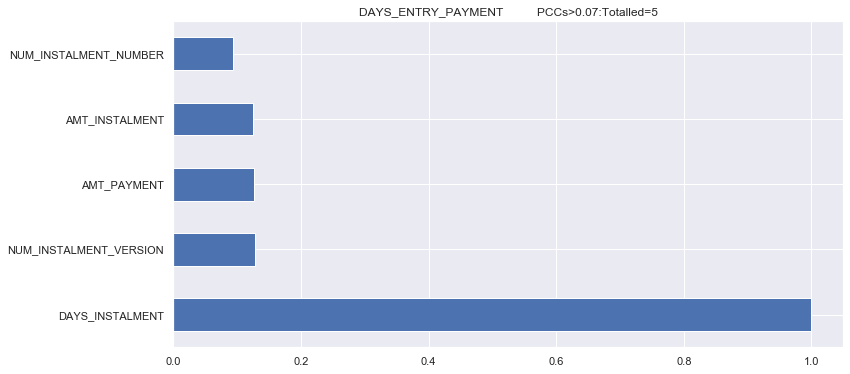

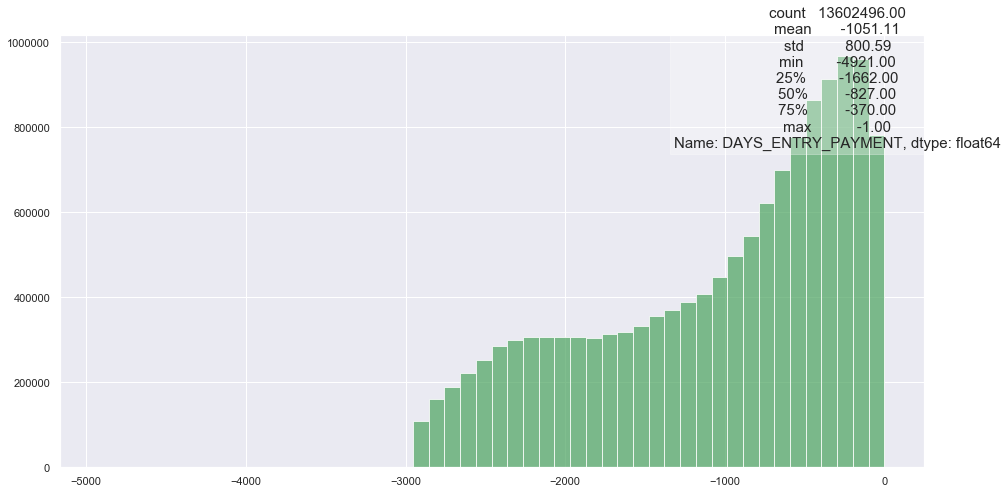

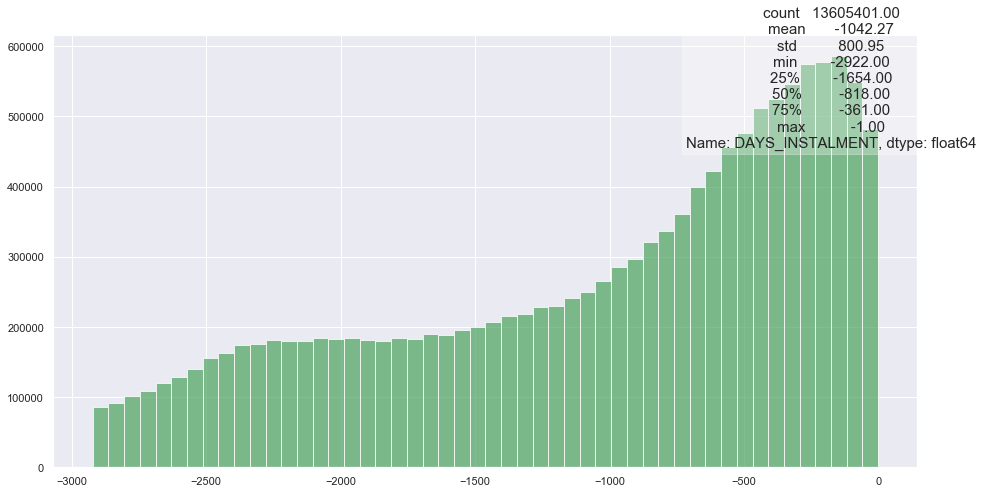

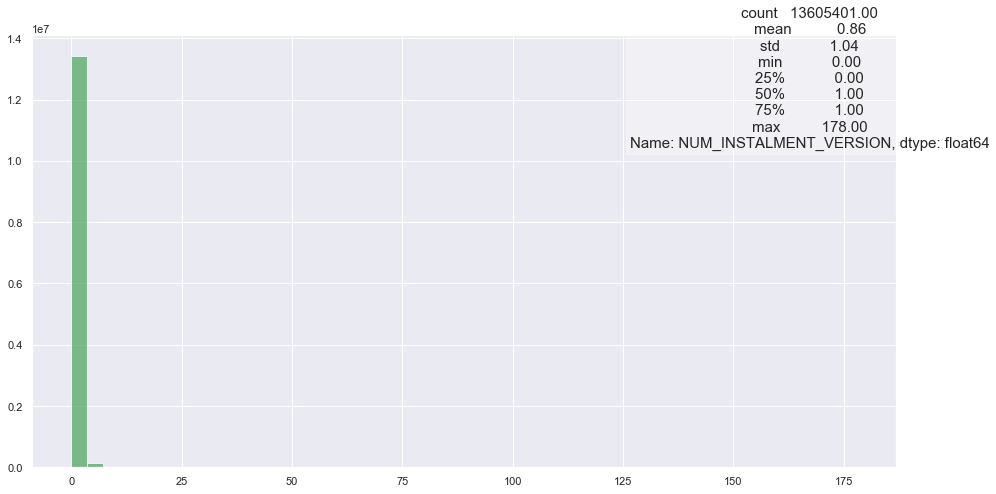

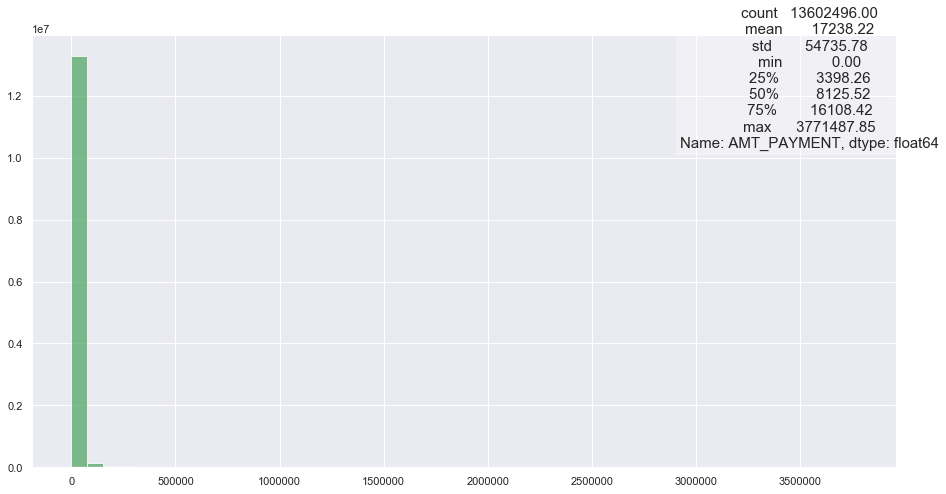

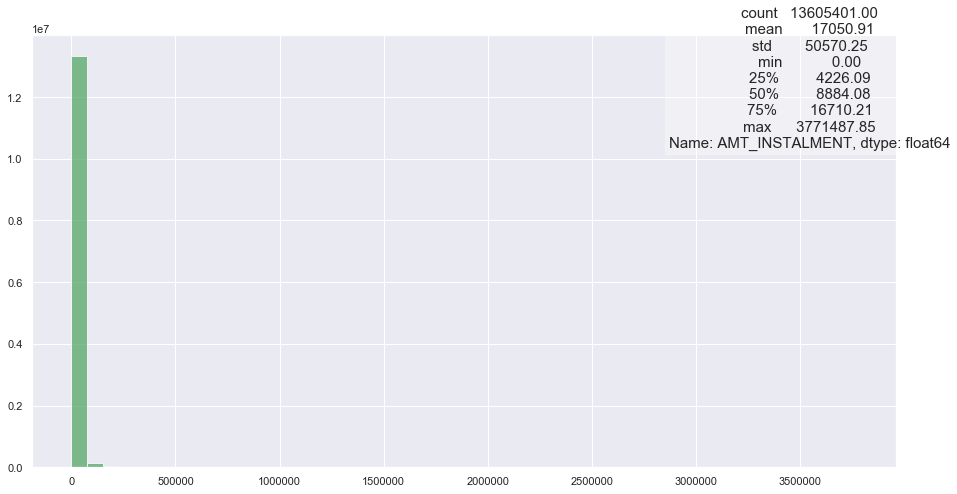

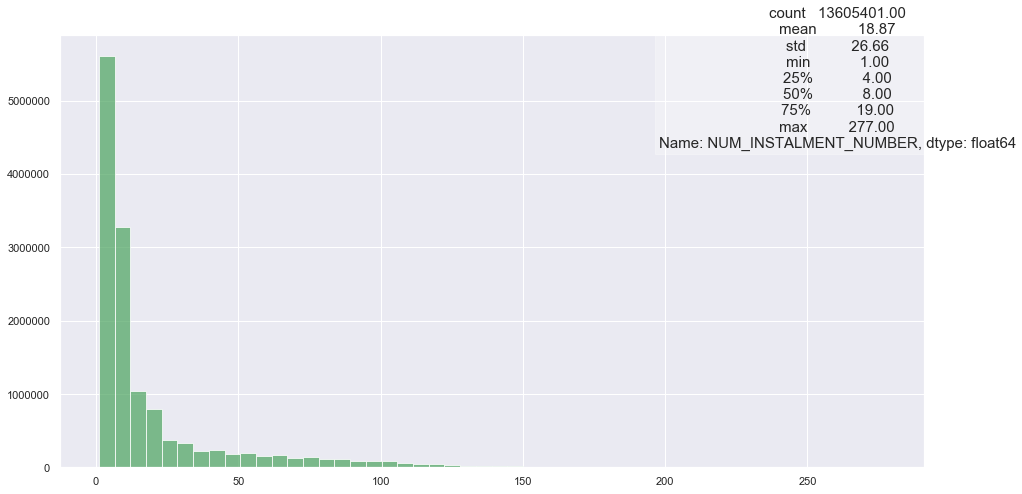

In [37]:
pearson_corr(PCCs=0.07,target='DAYS_ENTRY_PAYMENT',detiall=True) # PCCs = 0.7 為預設值

# 8.顯示數值型欄位盒鬚圖(移除空值後)

In [38]:
def get_int_columns():
    '''排序數值型欄位，並顯示Index。'''
    data_type=data.select_dtypes(include=['int64','float64'])
    index_data=pd.DataFrame(data_type.columns,columns=['數值欄位名稱'] ,index=list(range(1,len(data_type.columns)+1)))
    index_data.columns.name='Index'
    return index_data
def show_boxplot(num=1):
    '''依index選定要顯示欄位盒鬚圖,或輸入字串all,*,_,A等字元顯示全部數值型欄位盒鬚圖。'''
    data_int_type=data.select_dtypes(include=['int64','float64'])
    if num in [ '*' ,'all','ALL','All','A','a','_' ] :
        get_int_colums=data_int_type.columns.to_list()
        x=math.ceil(( len(get_int_colums)) / 2)
        fig, axes = plt.subplots(x,2, figsize=(10,40), dpi=150)
        for items in range(0,len(get_int_colums)):
            ax=axes.reshape(-1)[items]
            ax.set_title('{} , nulls = {:,}'.format(get_int_colums[items],data_int_type[get_int_colums[items]].isnull().sum()))
            data_int_type[get_int_colums[items]].dropna().plot(kind='box',ax=ax,label="")
        plt.show()
    else:
        data_int_type=data.select_dtypes(include=['int64','float64'])
        data_int=data_int_type[data_int_type.columns[num-1]]
        print ("{} 資料集之\"{}\"數值型欄位的盒鬚圖。".format(data_name,data_int_type.columns[num-1]))
        plt.boxplot(data_int.dropna())    
        plt.show()

In [ ]:
#get_int_columns.__doc__ #文件說明

In [39]:
get_int_columns()  ##輸入上表清單的index，欄位預設為第一個。

Index,數值欄位名稱
1,SK_ID_PREV
2,SK_ID_CURR
3,NUM_INSTALMENT_VERSION
4,NUM_INSTALMENT_NUMBER
5,DAYS_INSTALMENT
6,DAYS_ENTRY_PAYMENT
7,AMT_INSTALMENT
8,AMT_PAYMENT


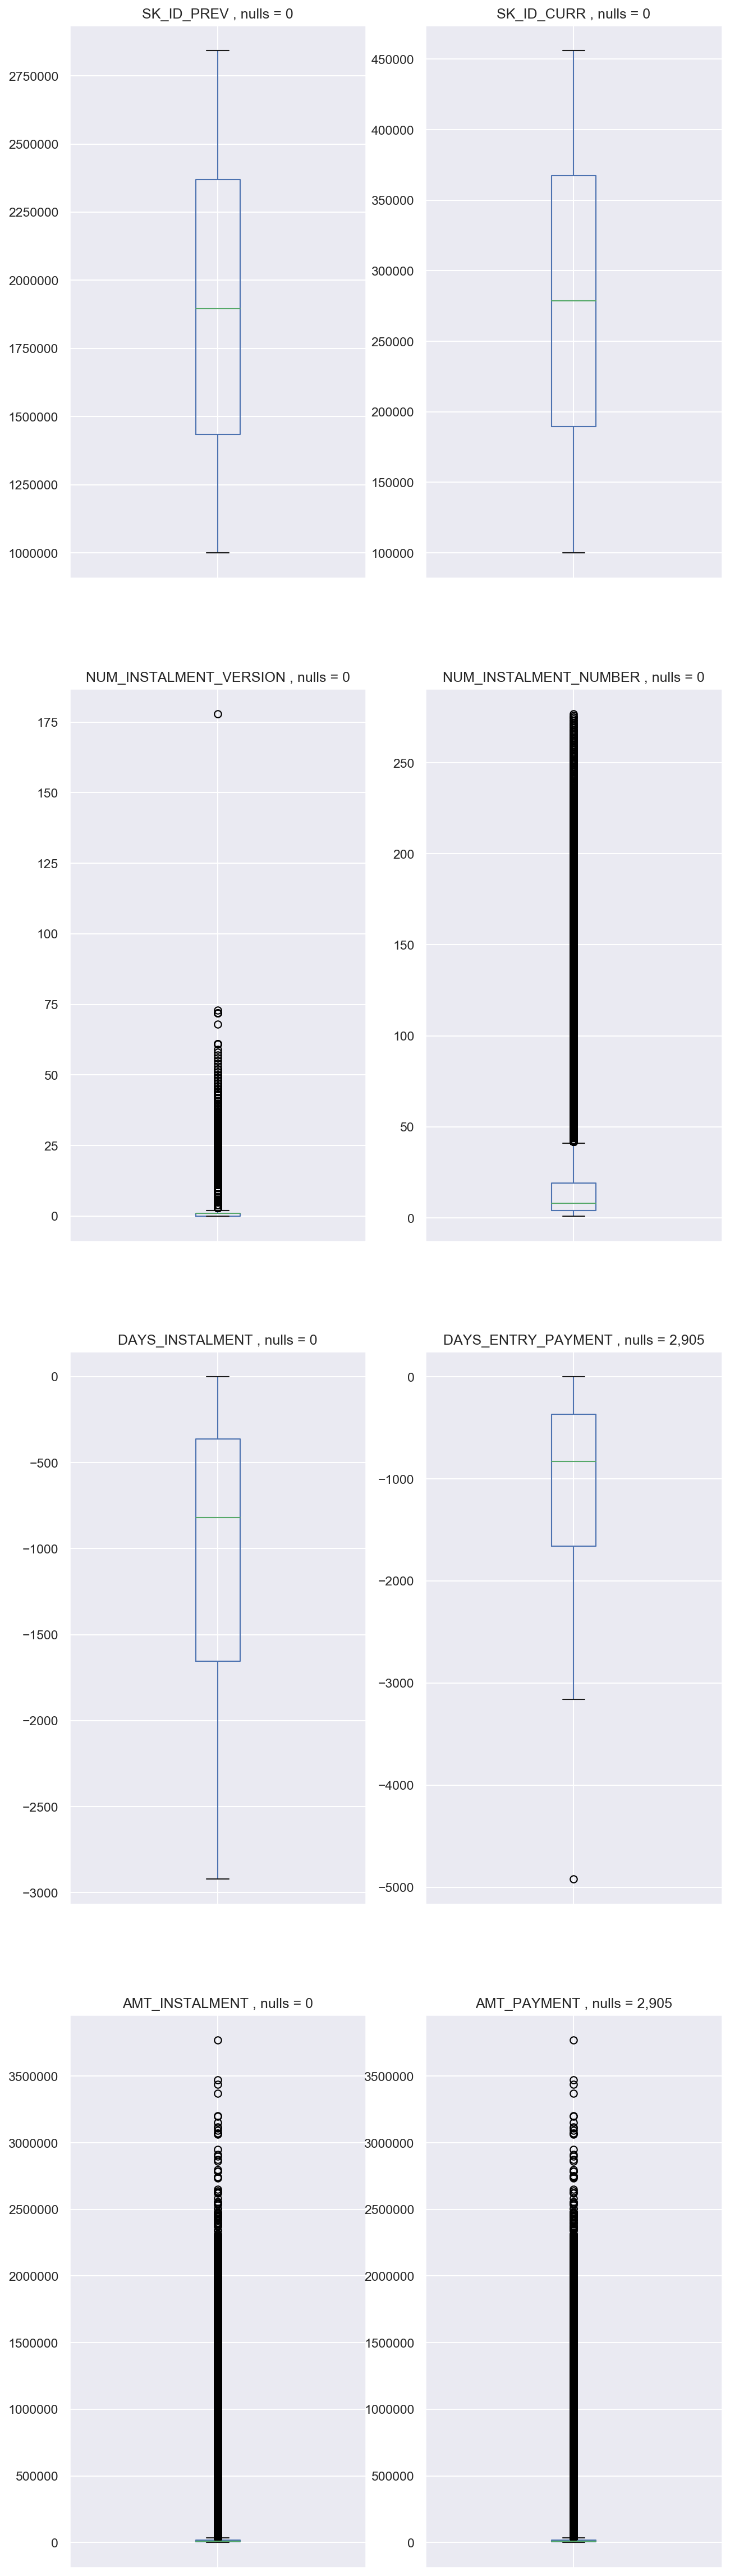

In [40]:
show_boxplot('*') #預設顯示第一個欄位(輸入'*','_','All'會顯示全部)